# Performing LDA onto disc extracted features
Performing linear discriminant analysis: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GroupShuffleSplit
import matplotlib.patches as mpatches

Loading extracted files for disc segments.

In [42]:
# import file containing compiled dataframe 
df = pd.read_csv('data_radiomics_discs_fil.csv', index_col = 0)

Checking if any feature name type needs to be changed.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, S257_L1L2 to S255_L5S1
Data columns (total 67 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_glcm_Autocorrelation                       245 non-null    float64
 1   original_glcm_ClusterProminence                     245 non-null    float64
 2   original_glcm_ClusterTendency                       245 non-null    float64
 3   original_glcm_Contrast                              245 non-null    float64
 4   original_glcm_Correlation                           245 non-null    float64
 5   original_glcm_DifferenceAverage                     245 non-null    float64
 6   original_glcm_DifferenceEntropy                     245 non-null    float64
 7   original_glcm_DifferenceVariance                    245 non-null    float64
 8   original_glcm_Id                                    245 non-null    flo

In [31]:
df['Pfirrman_degeneration_score'] = df['Pfirrman_degeneration_score'].astype('category')

### Performing Train/Test/Valid Split

First splitting dataset 20/80, where 20% will be kept for validation and 80% will be used for doing a second split to aquire training and testing data.

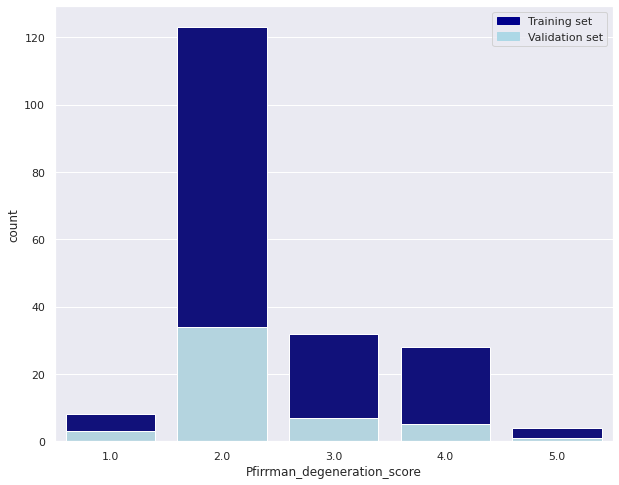

In [44]:
# extract the patient ID from each index label
df['patient_id'] = df.index.str.split('_').str[0]

# define the features and target variable
X = df.drop(columns=['Pfirrman_degeneration_score','ODI']) 
y = df['Pfirrman_degeneration_score']

# define the groups (in your case, patient IDs)
groups = df['patient_id']

# define the GroupShuffleSplit with the desired test_size
gss = GroupShuffleSplit(n_splits=1, test_size=0.20, random_state=66)

# loop over the splits to get the indices for the training and testing sets
for train_idx, valid_idx in gss.split(X, y, groups):
    # extract the training and testing data based on the indices
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
    
    # Plotting ______________________________________
    # set plot style: grey grid in the background:
    sns.set(style="darkgrid")
    
    # set the figure size
    plt.figure(figsize=(10, 8))
    
    # plot the distribution of labels in the training and testing sets
    ax = sns.countplot(x=y_train, color='darkblue')
    ax = sns.countplot(x=y_valid, color='lightblue')

    # add legend
    top_bar = mpatches.Patch(color='darkblue', label='Training set')
    bottom_bar = mpatches.Patch(color='lightblue', label='Validation set')
    plt.legend(handles=[top_bar, bottom_bar])

Conducting train/test split

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


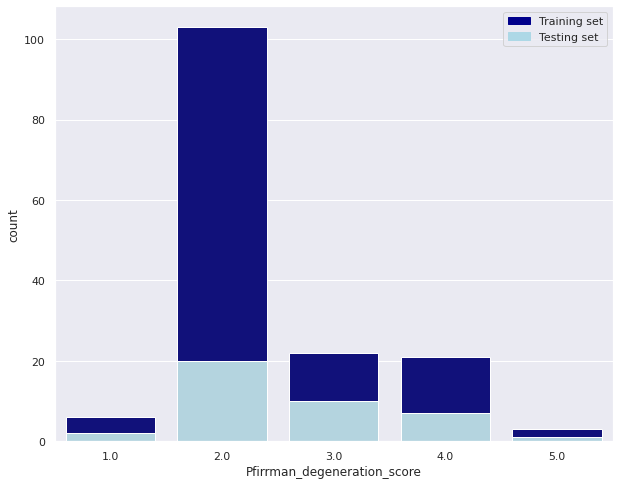

In [34]:
# define the features and target variable
X = X_train.drop(columns=['patient_id']) 
y = y_train

# define the groups (in your case, patient IDs)
groups = X_train['patient_id']

# define the GroupShuffleSplit with the desired test_size
gss = GroupShuffleSplit(n_splits=1, test_size=0.20, random_state=4)

# loop over the splits to get the indices for the training and testing sets
for train_idx, test_idx in gss.split(X, y, groups):
    # extract the training and testing data based on the indices
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Plotting ______________________________________
    # set plot style: grey grid in the background:
    sns.set(style="darkgrid")
    
    # set the figure size
    plt.figure(figsize=(10, 8))
    
    # plot the distribution of labels in the training and testing sets
    ax = sns.countplot(x=y_train, color='darkblue')
    ax = sns.countplot(x=y_test, color='lightblue')

    # add legend
    top_bar = mpatches.Patch(color='darkblue', label='Training set')
    bottom_bar = mpatches.Patch(color='lightblue', label='Testing set')
    plt.legend(handles=[top_bar, bottom_bar])


In [36]:
X_valid = X_valid.drop(columns='patient_id')

Perform LDA on training set

In [37]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.get_feature_names_out(input_features=None)

array(['lineardiscriminantanalysis0', 'lineardiscriminantanalysis1',
       'lineardiscriminantanalysis2', 'lineardiscriminantanalysis3'],
      dtype=object)

Tranforming all feature sets with fitted LDA model

In [38]:
# transform features on test and train
X_train = clf.transform(X_train)
X_test = clf.transform(X_test)
X_valid = clf.transform(X_valid)

Saving feature sets with corresponding label sets as seperate csv files

In [39]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

X_valid = pd.DataFrame(X_valid)
y_valid = pd.DataFrame(y_valid)


X_train.to_csv('X_train.csv', index=True)
y_train.to_csv('y_train.csv', index=True)
X_test.to_csv('X_test.csv', index=True)
y_test.to_csv('y_test.csv', index=True)
X_valid.to_csv('X_valid.csv',index=True)
y_valid.to_csv('y_valid.csv',index=True)